In [23]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

x = np.arange(0, 5.5, 0.5)
y = np.array([2.9, 2.7, 4.8, 5.3, 7.1, 7.6, 7.7, 7.6, 9.4, 9.0, 9.6], dtype = float)

A = np.vstack([np.ones_like(x), x, x ** 2]).T

N = np.dot(np.transpose(A), A)
z = np.dot(np.transpose(A), y)

w = la.solve(N, z)
print(w)

[ 2.41468531  2.41738928 -0.2009324 ]


In [26]:
def cholesky(M):
    n = M.shape[0]
    L = np.zeros((n,n), dtype = float)

    for i in range(n):
        for j in range(i+1):
            if i == j:
                s = 0
                for k in range(i):
                    s += L[j, k] ** 2 
                L[i, j] = np.sqrt(M[i, j] - s) 
            elif i>j:
                s = 0
                for k in range(i):
                    s += L[i,k] * L[j,k]
                L[i, j] = (M[i, j] - s) / L[j, j]
    return L

def back_sub(A, b):
    n = len(b)
    x = np.zeros(len(b), dtype = float)
    for i in range(n - 1, -1, -1):
        if A[i, i] == 0:
            raise ValueError("Matrix is singular")
        x[i] = b[i]
        for j in range(i+1, n):
            x[i] -= A[i, j] * x[j]
        x[i] = x[i] / A[i, i]
    return x

def fwd_elim(A, b):
    n = len(b)
    x = np.zeros(len(b), dtype = float)
    
    for i in range(n):
        if A[i, i] == 0:
            raise ValueError("Matrix is singular")
        x[i] = b[i]
        for j in range(0, i):
            x[i] -= A[i, j] * x[j]
        x[i] = x[i] / A[i, i]
    
    return x

[ 2.41468531  2.41738928 -0.2009324 ]


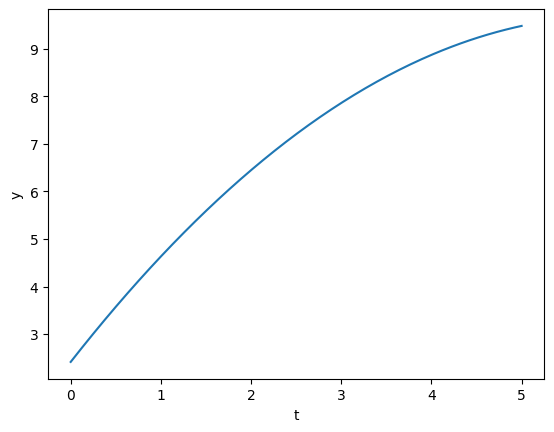

In [28]:
M = cholesky(N)
y = fwd_elim(M, z)
l = back_sub(M.T, y)
print(l)

def poly(t, w):
    n = len(w)
    z = 0
    for i in range(n):
        z += w[i] * (t ** i)
    return z

t = np.linspace(0, 5, 200, endpoint = True)
f = poly(t, l)

fig = plt.figure()
plt.plot(t, f)
plt.xlabel('t')
plt.ylabel('y')
#plt.scatter(x, y)
fig.savefig('soln.png')